In [1]:
import base64
import getpass
import io
from pathlib import Path

from pdf2image import convert_from_path
from PIL import Image
import requests

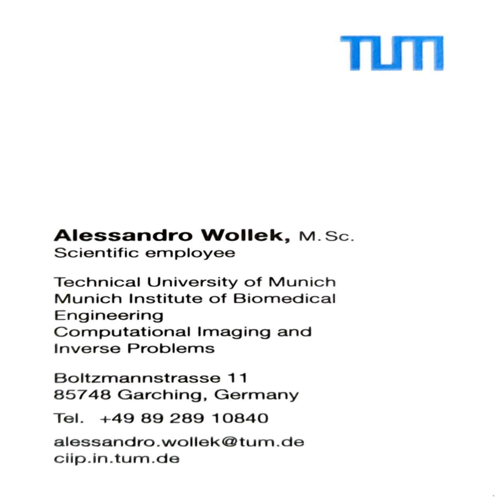

In [2]:
path = Path("Test_Card.pdf")
document = convert_from_path(path, fmt="jpg")
document[0].resize((500, 500))

In [3]:
img_byte_arr = io.BytesIO()
document[0].resize((512, 512)).save(img_byte_arr, format='JPEG')
base64_image = base64.b64encode(img_byte_arr.getvalue()).decode('utf-8')
api_key = getpass.getpass("Your OpenAI API key")

Your OpenAI API key ········


In [4]:
PROMPT_MESSAGES = [
    {
        "role": "user",
        "content": [
            "This is a business card."
            "Extract all entities and label them. For example, first name, last name, company. ",
            "Return ONLY the result as a key-value list with the syntax:",
            "`- key :: value  `",
            "Example: ",
            "`- First Name :: Mike`",
            {"image": base64_image},
        ],
    },
]
params = {
    "model": "gpt-4o-mini",
    "messages": PROMPT_MESSAGES,
    "max_tokens": 1000,
    "temperature": 0
}

response = requests.post("https://api.openai.com/v1/chat/completions",
                         json=params,
                         headers={"Authorization": f"Bearer {api_key}"})     

print(response.json()["choices"][0]["message"]["content"])

- First Name :: Alessandro  
- Last Name :: Wollek  
- Degree :: M. Sc.  
- Job Title :: Scientific employee  
- Company :: Technical University of Munich  
- Department :: Munich Institute of Biomedical Engineering  
- Specialization :: Computational Imaging and Inverse Problems  
- Address :: Boltzmannstrasse 11, 85748 Garching, Germany  
- Phone :: +49 89 289 10840  
- Email :: alessandro.wollek@tum.de  
- Website :: ciip.in.tum.de  
